## Exploratory analysis


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
df = pd.read_csv('./problem_data.csv',header=None,
            na_values='',
            names=["col1", "col2", 'col3','col4','col5','col6','col7']) #identify that there are 7 columns in csv

**Identify Data Types**

In [2]:
df.dtypes

col1    float64
col2      int64
col3      int64
col4      int64
col5    float64
col6    float64
col7    float64
dtype: object

**Size of Dataset**

In [3]:
print('No. of examples:',df.shape[0])
print('No. of columns', df.shape[1])

No. of examples: 818
No. of columns 7


**Check for any missing values and range of values each column has**

In [4]:
for col in df.columns:
    uniqueCount = len(df[col].unique())
    naCount = df[col].isnull().sum()
    naCountpct = round(naCount/len(df),5) * 100
    print(col)
    print('Number of unique values:', uniqueCount)
    print('Number of missing values:', naCount)
    print('Missing values percentage(%):', naCountpct)
    if col != 'col1':
        print('Unique values:', df[col].unique())
    print('------------------------------')

col1
Number of unique values: 230
Number of missing values: 0
Missing values percentage(%): 0.0
------------------------------
col2
Number of unique values: 3
Number of missing values: 0
Missing values percentage(%): 0.0
Unique values: [-1  0  1]
------------------------------
col3
Number of unique values: 12
Number of missing values: 0
Missing values percentage(%): 0.0
Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11]
------------------------------
col4
Number of unique values: 36
Number of missing values: 0
Missing values percentage(%): 0.0
Unique values: [ 0  2  4  3  6 14  7 17 16 19  8 22 21 24  9 27 26 29 10 31 30 32 11 34
 33 35 12 38 37 39 41 40  1 36 42 43]
------------------------------
col5
Number of unique values: 46
Number of missing values: 12
Missing values percentage(%): 1.467
Unique values: [ 1.  0.  3.  5.  4.  2.  7.  8.  9. 10. 11. 12. 13. 15. 14. 16. 18. 17.
 20. 19. 21. 23. 22. 25. 24. 26. 28. 27. 29. 30. 31. 32. 33. 34. 36. 35.
 37. 38.  6. 40. 41. -1. nan 39.

Observe that there are many unique values in **col1**, this could represent some sort of **id** where we might gain further insights if we group the **ids** together

There is a high percentage (74.8%) of missing values for **col6 and col7**. 

**col3** seem to indicate some ordinal variable if we look at its unique values [0,1,...,11]

**Statistical summary of numeric variables**

col1 seems like some sort of *id*

col2 only takes on discrete values from -1 to 1

col3 looks like ordinal data

col6 and col7 has NA as ~75% of its data

Explore stats summary for col4 and col5 only

In [15]:
df[['col4', 'col5']].describe()



,col4,col5
count,818.000000,806.000000
mean,13.911980,16.059553
std,13.868312,13.009272
min,0.000000,-1.000000
25%,2.000000,4.000000
50%,8.000000,14.000000
75%,26.000000,28.000000
max,43.000000,43.000000


**Explore correlations between each variable (col2, col3, col4 and col5)**

Text(0.5, 1, 'Pair-wise correlation')

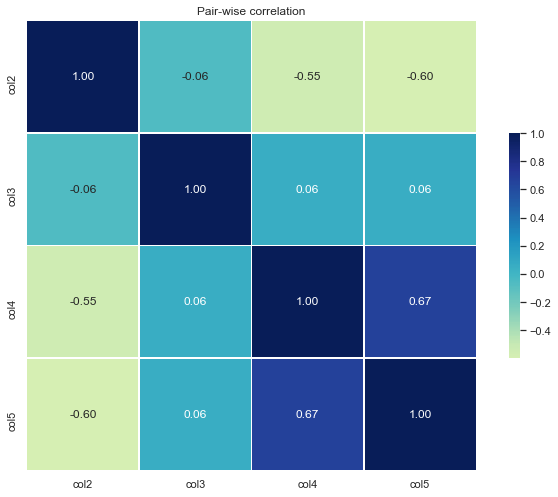

In [16]:
sns.heatmap(df[['col2','col3','col4','col5']].corr(),vmax=1,center=0, square=True,linewidths=.5,cmap="YlGnBu",
           cbar_kws={"shrink":.5},annot=True, fmt=".2f")
plt.title('Pair-wise correlation')



From this correlation matrix plot, we see a corr value of:
1. -0.547 between col2 and col4
2. -0.596 between col2 and col5
3. 0.667 between col4 and col5

I am going to start exploring the relationship between **col2 and col4**, **col2 and col5** and **col4 and col5**

### Explore col2
**col2 takes on values in the range [-1, 0, 1].** I noticed that col1 values, where their respective col2 value is -1, were repeated. 


In [7]:
#count number of unique values for each col2 value [-1, 0, 1]
df2 = df.pivot_table(values='col1', index=['col2'], 
               aggfunc={lambda x:len(x.unique()), 'count'})
df2.columns = ['Unique col1 count','col2 counts']
df2

,Unique col1 count,col2 counts
col2,,
-1,12.0,600
0,206.0,206
1,12.0,12


From the pivot table above, I note that there 12 unique col1 values where col1= -1, 206 for 0 and 12 for 1. 
Interestingly, we see that for col2 = -1, there are 12 unique col1 values for 600 rows which means that each of those 12 col1 values have been repeated in the dataset. It states otherwise for col2 = 0 and col2 = 1 where there are 218 unique col1 values for 218 col2 values

I wanted to use **ANOVA** to get sense of correlation between col2 and col4 because col2 seems to be categorical in terms of numerical data. However for the ANOVA test to work:
1. the samples must be independent
2. each sample is normally distributed
3. population SD of groups are equal (homoscedasticity)

### col2 vs col4

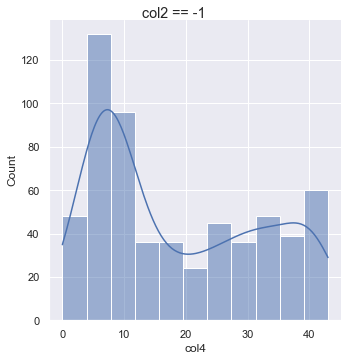

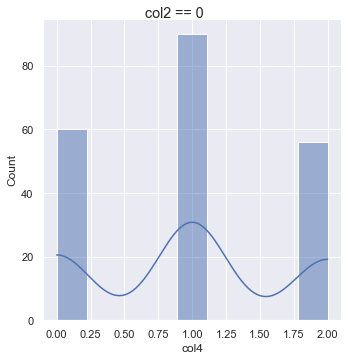

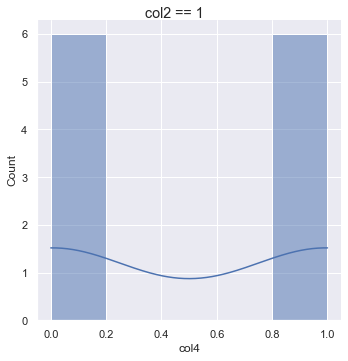

In [8]:
#check if samples for each unique value of col2 are normally distributed
for val in df.col2.unique():
    #print('Distribution of col4 values when col2 = {}'.format(val))
    plot = sns.displot(data=df[df.col2==val], x='col4', kde=True)
    plot.fig.suptitle('col2 == {}'.format(val), y=1.00)

Assumption that samples are normally distributed is violated so we cannot use ANOVA here. However, from the above plots, I observe that range of col4 values for each value of col2 is different. This could explain the -0.56 correlation value between col2 and col4.

In [9]:
#check range of col4 values
for val in df.col2.unique():
    print('For col2 == {}:'.format(val))
    print('Number of unique values:', len(df[df.col2==val].col4.unique()))
    print('Unique values:', df[df.col2==val].col4.unique())
    print('-------')

For col2 == -1:
Number of unique values: 35
Unique values: [ 0  2  4  3  6 14  7 17 16 19  8 22 21 24  9 27 26 29 10 31 30 32 11 34
 33 35 12 38 37 39 41 40 36 42 43]
-------
For col2 == 0:
Number of unique values: 3
Unique values: [0 1 2]
-------
For col2 == 1:
Number of unique values: 2
Unique values: [1 0]
-------


The range of values that col4 takes on is different for each of the 3 values in col2.

if value of col2 is 1: col4 values take on [0,1]

if value of col2 is 0: col4 values take on [0,1,2]

if value of col2 is -1: col4 values take on [0,...,43] (This may be some sort of distribution)

### Explore col4
**col4 seems to take on a range of values. Explore CDF for col4 values across the dataset.**

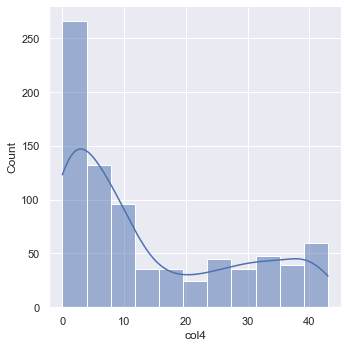

In [10]:
plot = sns.displot(data=df, x='col4', kde=True)


I want to explore the distribution of col4 given each col2(categorical) and col3(ordinal/categorical) values. 
Plot for col2 and col4 is shown at the top. Now I will plot for **col3 and col4**

### col3 vs col4

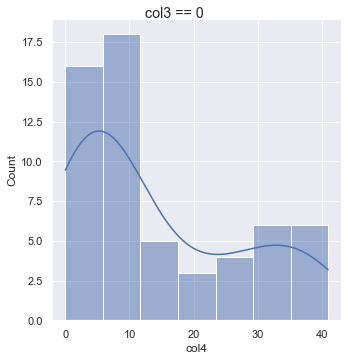

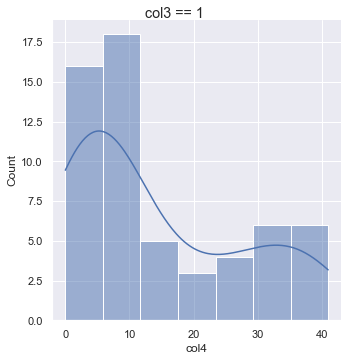

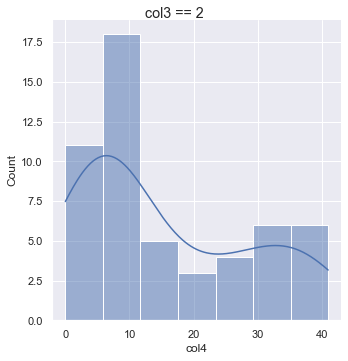

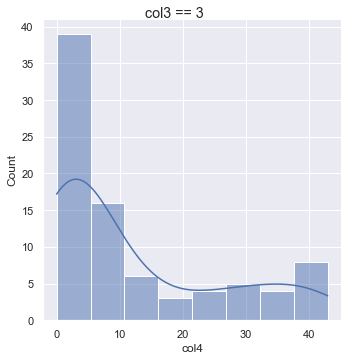

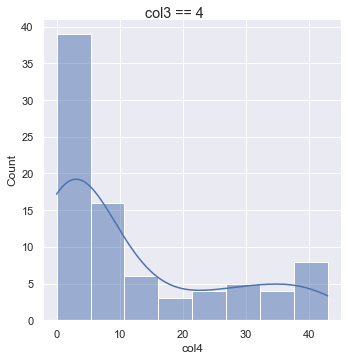

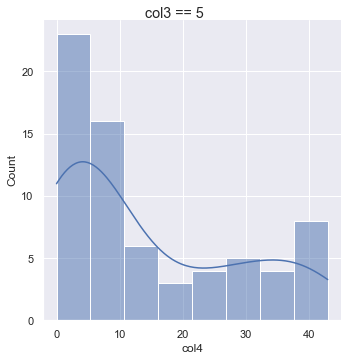

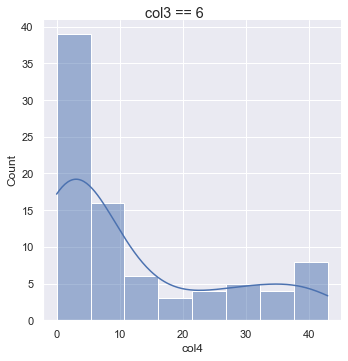

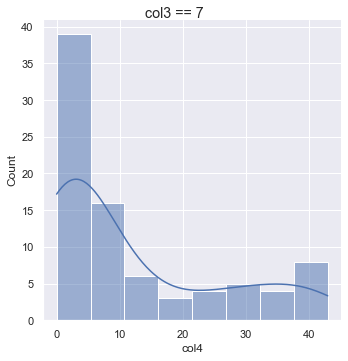

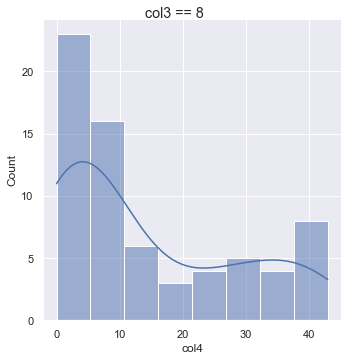

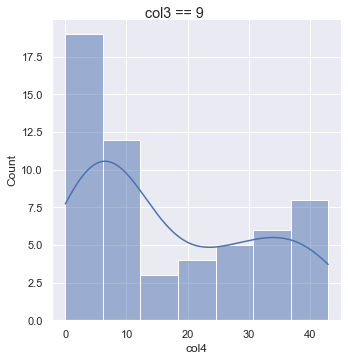

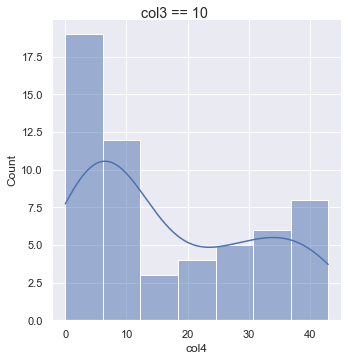

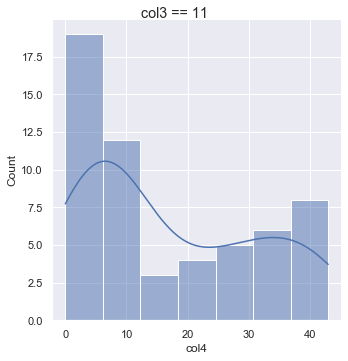

In [11]:
for val in df.col3.unique():
    #print('Distribution of col4 values when col2 = {}'.format(val))
    plot = sns.displot(data=df[df.col3==val], x='col4', kde=True)
    plot.fig.suptitle('col3 == {}'.format(val), y=1.00)

This is an interesting find because I notice that the distribution of col4 values have similar shape (bimodal) for each unique col3 value. This also further explains why the correlation value between col3 and col4 is very low at 0.06

### col2 vs col5

The correlation between col2 and col5 is -0.596 which means that they must slightly related to one another in some way. 

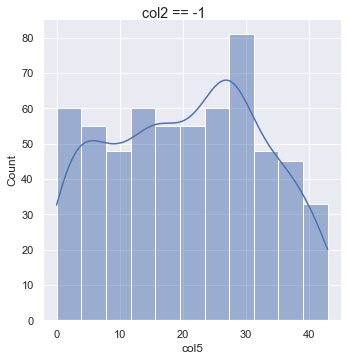

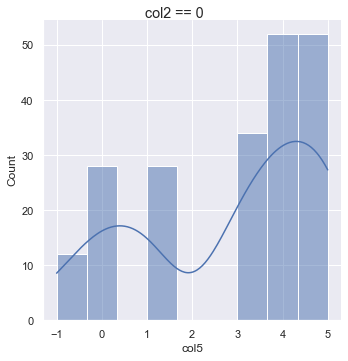

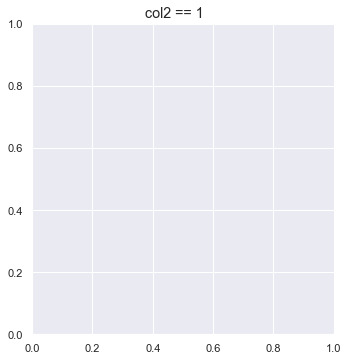

In [12]:
for val in df.col2.unique():
    plot = sns.displot(data=df[df.col2==val], x='col5', kde=True)
    plot.fig.suptitle('col2 == {}'.format(val), y=1.00)

The distribution of col5 for each unique value of col2 differs from one another. For col2 = 1, there is no col5 value.

The range of col5 values is different for col2 = -1 and col2 = 0. 

Distribution of col5 for col2 = -1, resembles a right tailed distribution, while that of col2 = 0 resembles a bimodal distribution

**Explore range of col5 values for each unique col2 value**

In [13]:
#check range of col5 values
for val in df.col2.unique():
    print('For col2 == {}:'.format(val))
    print('Number of unique values:', len(df[df.col2==val].col5.unique()))
    print('Unique values:', df[df.col2==val].col5.unique())
    print('-------')

For col2 == -1:
Number of unique values: 44
Unique values: [ 1.  0.  3.  5.  4.  2.  7.  8.  9. 10. 11. 12. 13. 15. 14. 16. 18. 17.
 20. 19. 21. 23. 22. 25. 24. 26. 28. 27. 29. 30. 31. 32. 33. 34. 36. 35.
 37. 38.  6. 40. 41. 39. 42. 43.]
-------
For col2 == 0:
Number of unique values: 6
Unique values: [ 3.  4.  0. -1.  5.  1.]
-------
For col2 == 1:
Number of unique values: 1
Unique values: [nan]
-------


When col2 = -1, range of col5 values is [0,...,43]

When col2 = 0, range of col5 values is [-1,0,1,3,4,5]

### col4 vs col5 

The correlation between col4 and col5 is 0.667. This tells us that both columns are positively linearly related to each other in some way.

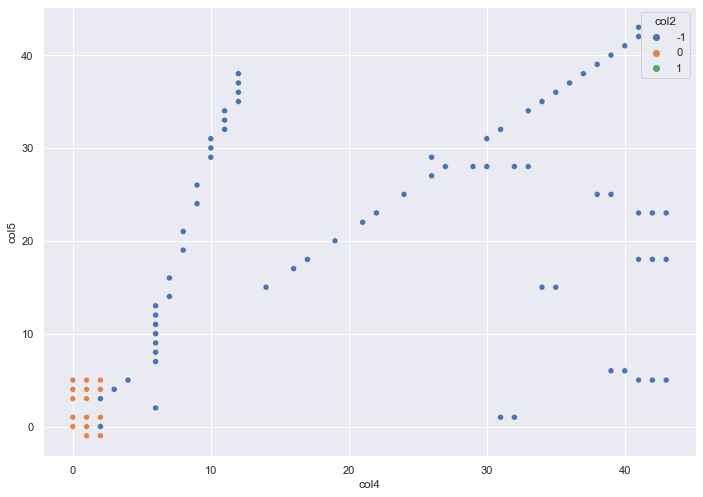

In [14]:
sns.scatterplot(data=df, x="col4", y="col5", hue="col2", palette='deep')


From the scatterplot, I observe that where col2 = -1, col4 and col5 values take on larger values. However for col2 = 0, range of col5 values are limited from [0,...,5] and col4 values take on a smaller range - [0,1,2]. Where col2 = 1, there are no points in the plot because col5 values are missing for this value of col2. This further demostrates that the correlation between col2 and col4, and col2 and col5 is indicative of the correlation between col4 and col5.

***Checkpoint:***

1. col2 values denote if their respective col1 values are duplicated. If col2 = -1, the associated col1 is repeated. Else if col2 = 0 or 1, there is only one unique col1 value tagged to it. There are 12 unique col1 values across 600 rows of col2 = -1 and 218 unique col1 values across 218 ros of col2 = 0 and 1
2. When col2 = -1, col4 and col5 values take on a wider range [0,..., 43]
3. When col2 = 1, there is no col 5, 6, 7
4. When col2 = -1, there is no col. 6, 7
5. Distribution of col4 is similar across all unique values of col3 [0,...11]. Somewhat models a bimodal distribution
6. Distribution of col4 is very different for each unique value of col2 [-1, 0, 1]